In [1]:
import cv2
import util
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inWidth = 600
inHeight = 600
whRatio = 1
inScaleFactor = 0.007843
net = cv2.dnn.readNetFromCaffe("MobileNetSSD_deploy.prototxt", "MobileNetSSD_deploy.caffemodel")
image_height = 720
image_weigth = 1280

# set threshold
confidenceThreshold = 0.15

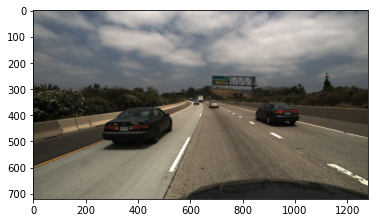

In [3]:
image_id = 3
folder = 'test'
img = util.read_velocity_image(folder, image_id, annotation=False)
plt.imshow(img)

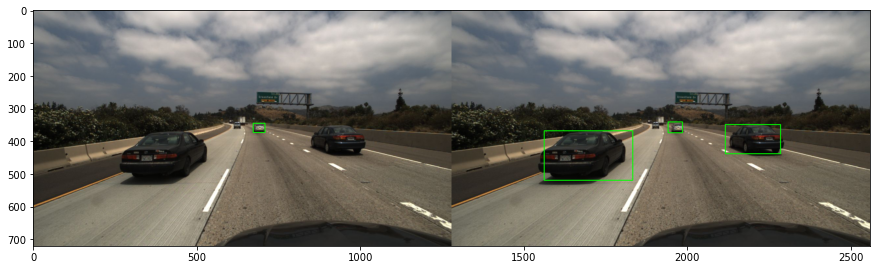

In [4]:
blob = cv2.dnn.blobFromImage(cv2.resize(img, (600, 600)), inScaleFactor, (inWidth,inHeight))
net.setInput(blob,"data")
detection = net.forward("detection_out")
detectionMat = np.resize(detection, (detection.shape[2], detection.shape[3]))
for i in range(detectionMat.shape[0]):
    # 6 equal to bus 7 equal to car
    if detectionMat[i,1] == 7 or detectionMat[i, 1] == 6:
        confidence = detectionMat[i, 2]
        if confidence >= confidenceThreshold:
            
            xleftBottom = detectionMat[i, 3] * img.shape[1]
            yleftBottom = detectionMat[i, 4] * img.shape[0]
            xrightTop = detectionMat[i, 5] * img.shape[1]
            yrightTop = detectionMat[i, 6] * img.shape[0]
            cv2.rectangle(img, (int(xleftBottom),int(yleftBottom)),(int(xrightTop),int(yrightTop)), (0,255,0), 2)

res = cv2.hconcat([util.read_velocity_image(folder, image_id, annotation=True), img])

fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.imshow(res)

left is gt, right is predicted